GPU is enabled 
Using custom starts and ends...
There are 95 unique characters in this dataset

lstm working

Epoch 0/9
----------
Working on sequence 0-1000000
finished training with this epoch!
training Loss:	3.7740377108256022

Working on sequence 0-1000000
finished validation with this epoch!
validation Loss:	3.5851223468780518


Epoch 1/9
----------
Working on sequence 0-1000000
finished training with this epoch!
training Loss:	3.3821627934773764

Working on sequence 0-1000000
finished validation with this epoch!
validation Loss:	3.363588730494181


Epoch 2/9
----------
Working on sequence 0-1000000
finished training with this epoch!
training Loss:	3.12968274752299

Working on sequence 0-1000000
finished validation with this epoch!
validation Loss:	3.20404314994812


Epoch 3/9
----------
Working on sequence 0-1000000
finished training with this epoch!
training Loss:	2.9091410477956137

Working on sequence 0-1000000
finished validation with this epoch!
validation Loss:	2.9749692281

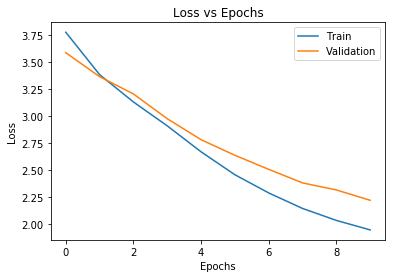

final output =  $
X26
T:Gouvolke
D:Meue fine z, Ildle-23
M:C|
K:F
FE FA:|2 FEE EE|A2 GE|ECGE AGA|GB AF|~G3 cGAFG|1 ddABA AB|dBBd ee2d|deg (3ede|d^df-aa eBf/ a2e|d2 Be|f2d ecA|G2 d2|1 dcd Acd|ege ecA|1 Bc AB A2 | d2 dc | "Dm"C"A2 | AG cB | A2 A d("AcA F2:|
;
final output =  $
XC
K:G
GB | A2c | "AABe gfe | [(3afd fecd | d2d dce | "G"G3 D2^E |
AFA :|2 BF A2d|1 ~B2 | e2c2 |
|: e2^c/B/|Bd dB|AF FF/A/|G2 e2 |
cgg (3feB BcA |
cdefe e2dc|BGc fedB :|
|: ec ee|cBA A3c|g2d ece|!
fAAB eGAB|cGBa fcAB|cccd|dBAG) AG|GD:|2 AFG ABB :|
|: BB2 c3 d2B|]
;


('C\nK:G\nGB | A2c | "AABe gfe | [(3afd fecd | d2d dce | "G"G3 D2^E |\nAFA :|2 BF A2d|1 ~B2 | e2c2 |\n|: e2^c/B/|Bd dB|AF FF/A/|G2 e2 |\ncgg (3feB BcA |\ncdefe e2dc|BGc fedB :|\n|: ec ee|cBA A3c|g2d ece|!\nfAAB eGAB|cGBa fcAB|cccd|dBAG) AG|GD:|2 AFG ABB :|\n|: BB2 c3 d2B|]\n;',
 array([[ 0.97994947, -0.74946535, -0.09982961, ...,  0.76089925,
          0.01028631, -0.12212299],
        [ 0.95314002, -0.74957299, -0.24593873, ...,  0.80467969,
          0.15372866, -0.2300179 ],
        [ 0.03166145,  0.76145226, -0.0061859 , ...,  0.85626453,
          0.19642931, -0.01329141],
        ..., 
        [ 0.17571722, -0.60587561, -0.7297188 , ..., -0.98679942,
          0.73893934, -0.88508564],
        [ 0.34214953, -0.75980836, -0.06645395, ..., -0.0740327 ,
          0.9667843 , -0.02297853],
        [ 0.02491607,  0.76150954, -0.0016246 , ..., -0.96841538,
          0.88171756, -0.01883862]], dtype=float32))

In [1]:
# imports
import torch
import utils
import my_models
import hyperparameters as h # this prints GPU enabled = True


files = ['sample-music.txt', 'input.txt']
# load the inputs as a list of ints
inputs, char2int_cypher, int2char_cypher = utils.load_music(files[1], use_custom=True)
# full input.txt is 501470 in length
dict_size = len(char2int_cypher) # conversion is the dict convert char to int

h.char2int_cypher = char2int_cypher
h.int2char_cypher = int2char_cypher


# define test and validation set
split = int(len(inputs) * h.validation_size) # change 0.1 to how big we want validation set to be
validation_set = inputs[:split]
training_set = inputs[split:]


# create model
lstm = my_models.lstm_char_rnn(dict_size, h.hidden_size, h.num_hidden_layers, batch_size=h.batch_size,dropout_prob=h.dropout,GRU=h.GRU)
init_hidden = lstm.initialize_hidden()
if h.GPU:
    if h.GRU: 
        init_hidden = init_hidden.cuda()
    else:
        print("lstm working")
        init_hidden = (init_hidden[0].cuda(), init_hidden[1].cuda())
    lstm.cuda()

optimizer_lstm = torch.optim.Adam(lstm.parameters(), lr=0.01)

mods = my_models.train(lstm, optimizer_lstm, h.epochs, training_set,
                       validation_set, h.sequence_length, init_hidden, force_epochs=True)

best_model_dict = mods[0]
last_model_dict = mods[1]

# save the best model dict to file in case we want to load it later and generate
torch.save(best_model_dict, h.save_file)
torch.save(last_model_dict, h.save_file_progress)
my_models.generate(h.save_file, lstm, h.temperature, h.prediction_length, h.generate_best_file)
my_models.generate(h.save_file_progress, lstm, h.temperature, h.prediction_length, h.generate_last_file)



In [5]:
import numpy as np
a = np.load('LSTM_3lay_100unit_25seq_1000batch_10epoch_0drop_1temp.npy')
print(a)

[[ 3.77403771  3.38216279  3.12968275  2.90914105  2.66917758  2.45737308
   2.28917341  2.14586051  2.03541558  1.94744347]
 [ 3.58512235  3.36358873  3.20404315  2.97496923  2.78139742  2.63708091
   2.50714151  2.38184698  2.31675355  2.22127803]]
